In [3]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import csv

A data loading function.

In [4]:
# import training data 
def load_data(csvname):
    # load in data
    reader = csv.reader(open(csvname, "rb"), delimiter=",")
    d = list(reader)

    # import data and reshape appropriately
    data = np.array(d).astype("float")
    X = data[:,0:2]
    y = data[:,2]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

The next cell contains all of the functionality for both gradient descent using a fixed step length as well as adaptive step length.  This includes functions for computing the current value of the cost function, gradient, and the descent loop itself.

In [5]:
# compute cost value
def compute_cost(X,y,w):
    cost = 0
    for p in range(0,len(y)):
        x_p = X[:,p]
        y_p = y[p]
        cost += max(0,1 - y_p*np.dot(x_p.T,w))**2
    return cost

# function for computing the softmax cost gradient
def compute_gradient(X,y,w):
    # produce gradient for each class weights
    grad = 0
    for p in range(0,len(y)):
        x_p = X[:,p]
        y_p = y[p]
        grad+= -2*max(0,1 - y_p*np.dot(x_p.T,w))*y_p*x_p
    
    grad.shape = (len(grad),1)
    return grad

# gradient descent with fixed step length
def grad_descent_fixed_step(X,y,w):
    # Initializations 
    alpha = 10**-2
    k = 1
    max_its = 100
    cost_history = []
    for k in range(max_its):
        # compute gradient
        grad = compute_gradient(X,y,w)
        
        # take gradient step
        w = w - alpha*grad;
        
        # update container
        cost = compute_cost(X,y,w)
        cost_history.append(cost)
        
    return cost_history

# gradient descent with fixed step length
def grad_descent_adaptive_step(X,y,w):
    # Initializations 
    max_its = 100
    cost_history = []
    for k in range(max_its):
        # compute gradient
        grad = compute_gradient(X,y,w)
        
        # compute step size
        alpha = line_search(X,y,w,grad)
        
        # take gradient step
        w = w - alpha*grad;
        
        # update container
        cost = compute_cost(X,y,w)
        cost_history.append(cost)
        
    return cost_history

# line search module
def line_search(X,y,w,grad):
    alpha = 1
    t = 0.5
    g_w = compute_cost(X,y,w)
    norm_w = np.linalg.norm(grad)**2
    while compute_cost(X,y,w - alpha*grad) > g_w - alpha*0.5*norm_w:
        alpha = t*alpha
    return alpha

Now that everything is defined, lets use it to compare gradient descent with a fixed step length to adaptive step length in terms of the cost function value at each iteration.

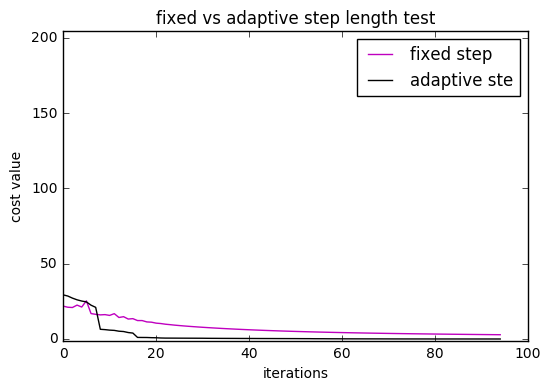

In [6]:
# load in data
X,y = load_data('imbalanced_2class.csv')

# run gradient descent
w0 = np.random.randn(3,1);        # random initial point
fixed_history = grad_descent_fixed_step(X,y,w0)
adaptive_history = grad_descent_adaptive_step(X,y,w0)

# plot both runs
plt.plot(fixed_history[5:],color = 'm')
plt.plot(adaptive_history[5:],'k')

# clean up plot
plt.ylim([min(min(fixed_history),min(adaptive_history)) - 1,max(max(fixed_history),max(adaptive_history)) + 1])
plt.xlabel('iterations')
plt.ylabel('cost value')
plt.legend(['fixed step','adaptive ste'])
plt.title('fixed vs adaptive step length test')
plt.show()